In [1]:
# The purpose of this model is to use nearest neighbor regressor
# to predict the global sales based on multiple features. One
# possible question might be solved by this model is: which genre
# of video game has the best global sales on different platform?
# By answering this question, the publisher will be able to
# identify what genre is suitable for what platform.

In [2]:
# set up environment by importing all necessary libraries.

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split

sns.set()

In [46]:
# load dataset and drop N/A
df = pd.read_csv('./data/vgsales.csv').dropna()

In [4]:
# see what's in the dataset
df.sample(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
10865,10867,Forever Kingdom,PS2,2001.0,Role-Playing,From Software,0.02,0.02,0.04,0.01,0.09
5655,5657,7 Wonders II,DS,2009.0,Puzzle,Rondomedia,0.14,0.15,0.00,0.03,0.32
7109,7111,Ratchet & Clank: Full Frontal Assault,PS3,2012.0,Adventure,Sony Computer Entertainment,0.19,0.01,0.00,0.02,0.23
5714,5716,Ganbare Goemon: KiraKira Douchuu - Boku ga Dan...,SNES,1995.0,Platform,Konami Digital Entertainment,0.00,0.00,0.31,0.00,0.31
10760,10762,Dragon Ball: Evolution,PSP,2009.0,Fighting,Namco Bandai Games,0.09,0.00,0.00,0.01,0.10
15881,15884,Kiss Bell,PSV,2014.0,Adventure,Giga,0.00,0.00,0.02,0.00,0.02
16006,16009,Secret Game Portable,PSP,2010.0,Adventure,Yeti,0.00,0.00,0.01,0.00,0.01
8496,8498,Bomberman Land,PS,2000.0,Misc,Hudson Soft,0.00,0.00,0.15,0.01,0.16
16514,16517,National Geographic Panda (JP sales),DS,2008.0,Simulation,Ubisoft,0.00,0.00,0.01,0.00,0.01
6825,6827,F1 2015,XOne,2015.0,Racing,Codemasters,0.08,0.15,0.00,0.02,0.24


In [5]:
X = df.drop(columns=['Rank','Name','Year','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'])
X.sample(10)

,Platform,Genre
12474,PS3,Strategy
16144,DS,Simulation
6555,Wii,Action
6922,PS,Sports
14144,X360,Sports
1054,SNES,Puzzle
159,PS3,Action
4481,SAT,Adventure
8110,PS3,Racing
7993,PS,Action


In [6]:
X['Platform'].value_counts()

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [7]:
X['Genre'].value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

In [8]:
y = df['Global_Sales']
y.sample(10)

8124     0.18
4490     0.44
8178     0.18
14678    0.03
6142     0.28
3329     0.61
4879     0.39
1978     1.05
911      1.89
10931    0.09
Name: Global_Sales, dtype: float64

In [9]:
# now we got our independent variables in "X"
# we got our target variables in "y"
# before we do any modeling, we need to process "X" first

In [10]:
# turn to one hot encoding
platform_one_hot = pd.get_dummies(X['Platform'])
genre_one_hot = pd.get_dummies(X['Genre'])

In [11]:
platform_one_hot.head(10)

,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
genre_one_hot.head(10)

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0,0,0


In [13]:
# now we merge those one hot variables
X = pd.concat([platform_one_hot, genre_one_hot], axis=1, join_axes=[platform_one_hot.index])
X.head(10)

,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [14]:
# train_test_split?

In [15]:
# now we need to split into 7:3 training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [16]:
X_train.head(5)

,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
3510,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13189,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4602,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1029,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8773,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [17]:
y_train.head(5)

3510     0.57
13189    0.05
4602     0.42
1029     1.73
8773     0.15
Name: Global_Sales, dtype: float64

In [18]:
X_test.head(5)

,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
7482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
719,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
y_test.head(5)

7482     0.21
719      2.25
5218     0.36
10121    0.11
14904    0.03
Name: Global_Sales, dtype: float64

In [20]:
# first let use the KNN
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

knn.score(X_test, y_test)

-0.416641505678911

In [21]:
# the R^2 score is VERY VERY LOW (facepalm)
# one thing that I'm curious is how can we even get negative value??

In [22]:
# let see the prediction
print(y_pred[:10])
print(y_test[:10])

[0.71666667 0.29466667 0.44466667 0.16466667 0.23533333 0.92533333
 0.37266667 0.29533333 0.45733333 0.42      ]
7482     0.21
719      2.25
5218     0.36
10121    0.11
14904    0.03
6924     0.24
5295     0.35
13875    0.04
2011     1.04
9879     0.12
Name: Global_Sales, dtype: float64


In [23]:
# let see what we can do to improve
# KNeighborsRegressor?
for i in range(10, 200, 10):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    print("Score of knn regression at "+ str(i) + " is: {}".format(knn.score(X_test, y_test)))

Score of knn regression at 10 is: -0.9768367852521755
Score of knn regression at 20 is: -0.23488106140405304
Score of knn regression at 30 is: -0.09034620278876337
Score of knn regression at 40 is: -0.06527234001744198
Score of knn regression at 50 is: -0.027537548119076494
Score of knn regression at 60 is: 0.005922347997617816
Score of knn regression at 70 is: -0.001030053736475578
Score of knn regression at 80 is: 0.007246137772097039
Score of knn regression at 90 is: 0.0101438114704272
Score of knn regression at 100 is: 0.015233119457709552
Score of knn regression at 110 is: 0.018642148637798006
Score of knn regression at 120 is: 0.02250405531522559
Score of knn regression at 130 is: 0.0005823130794057052
Score of knn regression at 140 is: -0.0029797919597844835
Score of knn regression at 150 is: 0.00039550109744224127
Score of knn regression at 160 is: 0.001041696006370385
Score of knn regression at 170 is: 0.0061300878300499795
Score of knn regression at 180 is: 0.0071367455002783

In [24]:
# The best result for using the KNN regressor is when
# the n_neighbors set to 120. The result become worse
# after 120 is due to overfitting.

In [25]:
# try to use different kind of encoding for categorical data instead of one hot
# first get the value for x and y
X = df.drop(columns=['Rank','Name','Year','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'])
y = df['Global_Sales']


In [26]:
# get unique genre and platform
unique_platform = X['Platform'].unique()
unique_genre = X['Genre'].unique()

In [27]:
X['Platform'] = X['Platform'].astype('category')
X['Platform'] = X['Platform'].cat.codes
X['Platform'] = X['Platform'] + 1 # to avoid 0 mapping
X['Genre'] = X['Genre'].astype('category')
X['Genre'] = X['Genre'].cat.codes
X['Genre'] = X['Genre'] + 1
X.describe()

,Platform,Genre
count,16291.000000,16291.000000
mean,16.812841,5.928611
std,8.369998,3.762844
min,1.000000,1.000000
25%,8.000000,2.000000
50%,17.000000,6.000000
75%,22.000000,9.000000
max,31.000000,12.000000


In [28]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [29]:
X_train.head(5)

,Platform,Genre
3510,17,6
13189,14,1
4602,7,4
1029,27,1
8773,16,7


In [30]:
y_train.head(5)

3510     0.57
13189    0.05
4602     0.42
1029     1.73
8773     0.15
Name: Global_Sales, dtype: float64

In [31]:
for i in range(10, 200, 10):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    print("Score of knn regression at "+ str(i) + " is: {}".format(knn.score(X_test, y_test)))

Score of knn regression at 10 is: -0.057523695784102324
Score of knn regression at 20 is: 0.0415612301450774
Score of knn regression at 30 is: 0.04506284603113486
Score of knn regression at 40 is: 0.0325489360606207
Score of knn regression at 50 is: 0.032035034310105015
Score of knn regression at 60 is: 0.036639507322938525
Score of knn regression at 70 is: 0.036862359593643035
Score of knn regression at 80 is: 0.0385725361213034
Score of knn regression at 90 is: 0.034895039851696175
Score of knn regression at 100 is: 0.03651840587507371
Score of knn regression at 110 is: 0.035425023506861386
Score of knn regression at 120 is: 0.03849262636684858
Score of knn regression at 130 is: 0.03631760487107593
Score of knn regression at 140 is: 0.03374953493765975
Score of knn regression at 150 is: 0.030073583141058124
Score of knn regression at 160 is: 0.030919373769158542
Score of knn regression at 170 is: 0.029539325174868125
Score of knn regression at 180 is: 0.029453045003150602
Score of kn

In [32]:
# we see a better result when n_neighbors is set to 30
# next we can compare the prediction and the actual value
knn = KNeighborsRegressor(n_neighbors=30)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [33]:
data = {'Actual Sales': y_test, 
        'Predicted Sales': y_pred,
        'difference': y_test - y_pred}
result = pd.DataFrame(data)
result.head(10)

,Actual Sales,Predicted Sales,difference
7482,0.21,0.335333,-0.125333
719,2.25,0.243667,2.006333
5218,0.36,0.988000,-0.628000
10121,0.11,0.205333,-0.095333
14904,0.03,0.318333,-0.288333
6924,0.24,0.878667,-0.638667
5295,0.35,0.431000,-0.081000
13875,0.04,0.490000,-0.450000
2011,1.04,0.532333,0.507667
9879,0.12,0.310333,-0.190333


In [34]:
temp = df.drop(columns=['Rank', 'Year', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])
temp.head(10)

,Name,Platform,Genre
0,Wii Sports,Wii,Sports
1,Super Mario Bros.,NES,Platform
2,Mario Kart Wii,Wii,Racing
3,Wii Sports Resort,Wii,Sports
4,Pokemon Red/Pokemon Blue,GB,Role-Playing
5,Tetris,GB,Puzzle
6,New Super Mario Bros.,DS,Platform
7,Wii Play,Wii,Misc
8,New Super Mario Bros. Wii,Wii,Platform
9,Duck Hunt,NES,Shooter


In [35]:
result = pd.merge(temp, result, left_index=True, right_index=True, how='outer').dropna()

In [36]:
result.sample(10)

,Name,Platform,Genre,Actual Sales,Predicted Sales,difference
4809,The Incredibles: Rise of the Underminer,GBA,Action,0.40,0.431000,-0.031000
3978,Star Wars: Jedi Starfighter,PS2,Simulation,0.50,0.545000,-0.045000
6344,NBA Jam 99,N64,Sports,0.27,0.311000,-0.041000
5947,Trace Memory,DS,Adventure,0.30,0.143667,0.156333
811,Dark Souls,PS3,Role-Playing,2.07,0.427667,1.642333
8739,Dragon Ball Z: Harukanaru Densetsu (JP sales),DS,Role-Playing,0.15,0.479333,-0.329333
14516,Doom 3 BFG Edition,PC,Shooter,0.03,0.301333,-0.271333
12699,Animorphs: Shattered Reality,PS,Action,0.06,0.684667,-0.624667
15460,Starship Troopers,PC,Shooter,0.02,0.301333,-0.281333
13789,Star Ocean 5: Integrity and Faithlessness,PS3,Role-Playing,0.04,0.427667,-0.387667


In [38]:
result['Predicted Sales'].describe()

count    4888.000000
mean        0.466107
std         0.325294
min         0.044333
25%         0.252667
50%         0.371333
75%         0.622333
max         2.739333
Name: Predicted Sales, dtype: float64

In [39]:
result['Actual Sales'].describe()

count    4888.000000
mean        0.536273
std         1.253338
min         0.010000
25%         0.060000
50%         0.180000
75%         0.492500
max        23.420000
Name: Actual Sales, dtype: float64

In [37]:
# one conclusion that we can draw is this model has very low accuracy.
# The overall predicted value is much lower than the actual value


In [ ]:
# After the discussion, we will try to add one more feature which is the
# NA_Sales to see if that will improve our model. We believe it will,
# since if the game has a good selling in the North America, it will do
# well globally

In [41]:
# get the feature and target value
X = df.drop(columns=['Rank','Name','Year','Publisher','EU_Sales','JP_Sales','Other_Sales','Global_Sales'])
y = df['Global_Sales']
# encoding the categorical data
X['Platform'] = X['Platform'].astype('category')
X['Platform'] = X['Platform'].cat.codes
X['Platform'] = X['Platform'] + 1 # to avoid 0 mapping
X['Genre'] = X['Genre'].astype('category')
X['Genre'] = X['Genre'].cat.codes
X['Genre'] = X['Genre'] + 1
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)
# training
for i in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    print("Score of knn regression at "+ str(i) + " is: {}".format(knn.score(X_test, y_test)))

Score of knn regression at 1 is: 0.7895847365350874
Score of knn regression at 2 is: 0.8034933789481628
Score of knn regression at 3 is: 0.7994885530334526
Score of knn regression at 4 is: 0.8089294859681462
Score of knn regression at 5 is: 0.8233001664793688
Score of knn regression at 6 is: 0.8270486438284447
Score of knn regression at 7 is: 0.8209500127670047
Score of knn regression at 8 is: 0.8227562339949056
Score of knn regression at 9 is: 0.8163632329882828
Score of knn regression at 10 is: 0.8107903734366749
Score of knn regression at 11 is: 0.8031362409202475
Score of knn regression at 12 is: 0.7992826209763444
Score of knn regression at 13 is: 0.7918540336478579
Score of knn regression at 14 is: 0.7846777584127874
Score of knn regression at 15 is: 0.7752947438390129
Score of knn regression at 16 is: 0.7680658859090599
Score of knn regression at 17 is: 0.7586741230371945
Score of knn regression at 18 is: 0.7527895494668894
Score of knn regression at 19 is: 0.7493342656494095


In [43]:
# The best result is obtained when n_neighbor is at 6
# Now we are going to show the comparison between predicted
# value and the actual value
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# putting the actual sales, predicted sales and the difference together
data = {'Actual Sales': y_test, 
        'Predicted Sales': y_pred,
        'difference': y_test - y_pred}
result = pd.DataFrame(data)
# get the Name, Platform, Genre and NA_Sales
temp = df.drop(columns=['Rank', 'Year', 'Publisher', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])
# merge them together
result = pd.merge(temp, result, left_index=True, right_index=True, how='outer').dropna()
result.sample(10)

,Name,Platform,Genre,NA_Sales,Actual Sales,Predicted Sales,difference
13317,Star Driver: Kagayaki no Takuto - Ginga Bishou...,PSP,Adventure,0.00,0.05,0.035000,0.015000
11082,The Sims 2: Apartment Life,PC,Simulation,0.00,0.09,0.111667,-0.021667
4563,SEGA Classics Collection,PS2,Misc,0.21,0.43,0.423333,0.006667
5756,Vigilante 8,N64,Racing,0.25,0.31,0.331667,-0.021667
7889,Brunswick Pro Bowling,PS3,Sports,0.10,0.19,0.251667,-0.061667
12672,The Sims 2: University,PC,Simulation,0.01,0.06,0.191667,-0.131667
2328,Blitz: The League,PS2,Sports,0.74,0.89,2.200000,-1.310000
12618,Archer Maclean Presents: Pool Paradise,PS2,Sports,0.03,0.06,0.105000,-0.045000
7513,Backyard NFL Football 2006,PS2,Sports,0.10,0.20,0.436667,-0.236667
13593,Zombi Daisuki,DS,Action,0.00,0.04,0.076667,-0.036667


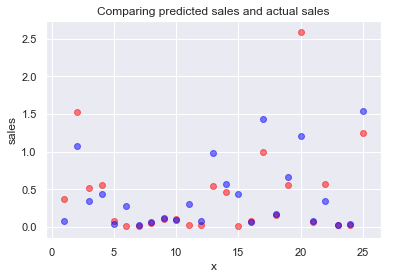

In [69]:
random_25 = result.sample(25, random_state=9)
x = [i+1 for i in range(25)]
y1 = list(random_25['Actual Sales'])
y2 = list(random_25['Predicted Sales'])
plt.scatter(x, y1, c='red', alpha=0.5)
plt.scatter(x, y2, c='blue', alpha=0.5)
plt.title('Comparing predicted sales and actual sales')
plt.xlabel('x')
plt.ylabel('sales')
plt.show()

In [70]:
# next we will try to use JP_Sales instead of NA_Sales
# get the feature and target value
X = df.drop(columns=['Rank','Name','Year','Publisher','NA_Sales','EU_Sales','Other_Sales','Global_Sales'])
y = df['Global_Sales']
# encoding the categorical data
X['Platform'] = X['Platform'].astype('category')
X['Platform'] = X['Platform'].cat.codes
X['Platform'] = X['Platform'] + 1 # to avoid 0 mapping
X['Genre'] = X['Genre'].astype('category')
X['Genre'] = X['Genre'].cat.codes
X['Genre'] = X['Genre'] + 1
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)
# training
for i in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    print("Score of knn regression at "+ str(i) + " is: {}".format(knn.score(X_test, y_test)))

Score of knn regression at 1 is: 0.06548004948137531
Score of knn regression at 2 is: 0.3004974825968326
Score of knn regression at 3 is: 0.37539459344317905
Score of knn regression at 4 is: 0.3774014424928926
Score of knn regression at 5 is: 0.4145303956975772
Score of knn regression at 6 is: 0.4046867979711105
Score of knn regression at 7 is: 0.39982487027707847
Score of knn regression at 8 is: 0.4077034101806165
Score of knn regression at 9 is: 0.4054702553971179
Score of knn regression at 10 is: 0.40384658986626865
Score of knn regression at 11 is: 0.3988846219234715
Score of knn regression at 12 is: 0.3907700714651766
Score of knn regression at 13 is: 0.39568628255557536
Score of knn regression at 14 is: 0.3970670965436618
Score of knn regression at 15 is: 0.3862764941452386
Score of knn regression at 16 is: 0.37947024503725363
Score of knn regression at 17 is: 0.3758586686886899
Score of knn regression at 18 is: 0.3685732538323512
Score of knn regression at 19 is: 0.3662859866979

In [72]:
# The best result is at 5
# Now we are going to show the comparison between predicted
# value and the actual value
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# putting the actual sales, predicted sales and the difference together
data = {'Actual Sales': y_test, 
        'Predicted Sales': y_pred,
        'difference': y_test - y_pred}
result = pd.DataFrame(data)
# get the Name, Platform, Genre and NA_Sales
temp = df.drop(columns=['Rank', 'Year', 'Publisher','NA_Sales', 'EU_Sales', 'Other_Sales', 'Global_Sales'])
# merge them together
result = pd.merge(temp, result, left_index=True, right_index=True, how='outer').dropna()
result.sample(10)

,Name,Platform,Genre,JP_Sales,Actual Sales,Predicted Sales,difference
9564,Shining Wind,PS2,Role-Playing,0.13,0.13,0.204,-0.074
10201,Soma Bringer,DS,Role-Playing,0.11,0.11,0.196,-0.086
360,Grand Theft Auto: Liberty City Stories,PS2,Action,0.07,3.54,1.066,2.474
11286,Rescue Heroes: Billy Blazes,GBA,Action,0.00,0.08,0.298,-0.218
1679,Enter the Matrix,XB,Action,0.01,1.20,0.130,1.070
11432,DanceDanceRevolution,X360,Simulation,0.00,0.08,0.926,-0.846
608,Crazy Taxi,PS2,Racing,0.06,2.52,3.578,-1.058
15425,Malice,PS2,Platform,0.00,0.02,0.406,-0.386
13439,Gray Matter,X360,Adventure,0.00,0.05,0.150,-0.100
6162,Jissen Pachi-Slot Hisshouhou! Moujuu-Oh S,PS2,Misc,0.28,0.28,0.242,0.038


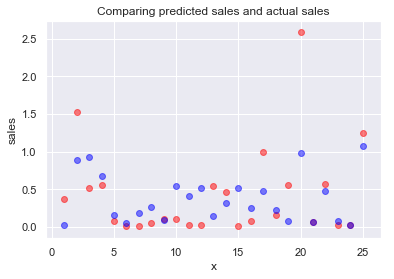

In [73]:
random_25 = result.sample(25, random_state=9)
x = [i+1 for i in range(25)]
y1 = list(random_25['Actual Sales'])
y2 = list(random_25['Predicted Sales'])
plt.scatter(x, y1, c='red', alpha=0.5)
plt.scatter(x, y2, c='blue', alpha=0.5)
plt.title('Comparing predicted sales and actual sales')
plt.xlabel('x')
plt.ylabel('sales')
plt.show()

In [ ]:
# As we can see, the second graph has more mismatch than the first one.
# This show that using the feature JP_Sales, is not as good as using
# NA_Sales. The NA_Sales still play dominating role in affecting the
# global sales